In [1]:
# Importamos numpy y matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Importamos lo necesario para crear la red
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend

# Importamos unos paquetes de sklearn para comprobar el modelo
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Text(0.5, 1.0, 'Label: 4')

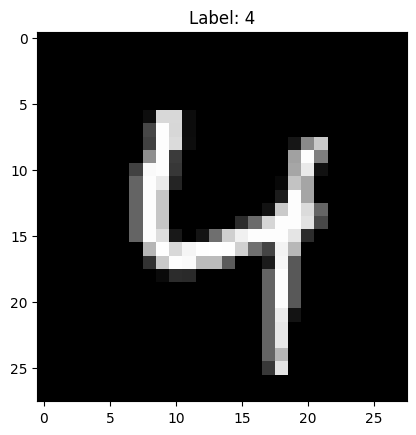

In [3]:
sample = np.random.randint(0,60000)
plt.imshow(xtrain[sample], cmap=plt.cm.gray)
plt.title('Label: ' + str(ytrain[sample]))

In [4]:
xtrain = xtrain.astype('float32')/255
xtest = xtest.astype('float32')/255

if backend.image_data_format() == 'channels_first':
    xtrain = xtrain.reshape(xtrain.shape[0], 1, 28, 28)
    xtest = xtest.reshape(xtest.shape[0], 1, 28, 28)
    input_shape = (1, 28, 28)
else:
    xtrain = xtrain.reshape(xtrain.shape[0], 28, 28, 1)
    xtest = xtest.reshape(xtest.shape[0], 28, 28, 1)
    input_shape = (28, 28, 1)

print(xtrain.shape)
print(input_shape)

(60000, 28, 28, 1)
(28, 28, 1)


In [5]:
ytrain = keras.utils.to_categorical(ytrain, 10)
print(ytrain)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [11]:
def build_model():
  model = Sequential()

  model.add(Conv2D(3,kernel_size=(3,3),
                   activation='relu',
                   input_shape=input_shape))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(30, kernel_size=(3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(60, kernel_size=(3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(5, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(10, activation='softmax'))

  model.compile(loss = keras.losses.categorical_crossentropy,
                optimizer = 'adam',
                metrics=['accuracy'])
  return model

In [12]:
model = build_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 3)         30        
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 3)        0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 13, 13, 3)         0         
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 30)        840       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 30)         0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 5, 5, 30)         

In [13]:
model.fit(xtrain, ytrain, batch_size=1000, epochs=12, verbose=1,
          validation_split=0.17)

Epoch 1/12
50/50 [==============================] - 20s 356ms/step - loss: 2.2766 - accuracy: 0.1264 - val_loss: 2.1853 - val_accuracy: 0.1922
Epoch 2/12
50/50 [==============================] - 17s 331ms/step - loss: 2.1229 - accuracy: 0.1884 - val_loss: 1.9467 - val_accuracy: 0.2975
Epoch 3/12
50/50 [==============================] - 17s 333ms/step - loss: 2.0093 - accuracy: 0.2360 - val_loss: 1.8202 - val_accuracy: 0.3575
Epoch 4/12
50/50 [==============================] - 18s 350ms/step - loss: 1.9081 - accuracy: 0.2506 - val_loss: 1.5916 - val_accuracy: 0.3898
Epoch 5/12
50/50 [==============================] - 16s 325ms/step - loss: 1.8185 - accuracy: 0.2670 - val_loss: 1.4873 - val_accuracy: 0.4779
Epoch 6/12
50/50 [==============================] - 17s 332ms/step - loss: 1.7762 - accuracy: 0.2835 - val_loss: 1.4407 - val_accuracy: 0.5652
Epoch 7/12
50/50 [==============================] - 18s 368ms/step - loss: 1.7422 - accuracy: 0.3016 - val_loss: 1.3674 - val_accuracy: 0.6490

In [14]:
ypred=model.predict(xtest)
print('Salida de la red:\n', ypred[0])

ypred = np.argmax(ypred, axis=1)
print('Predicciones:\n', ypred)

print('Reporte de clasificación:\n', classification_report(ytest, ypred))
print('Matriz de confusión:\n', confusion_matrix(ytest, ypred))

313/313 [==============================] - 2s 6ms/step
Salida de la red:
 [3.3143103e-02 2.5576761e-02 2.9590204e-01 2.3338015e-01 7.0366818e-06
 2.1884359e-04 3.0398480e-05 4.0786120e-01 3.1102479e-03 7.7017519e-04]
Predicciones:
 [7 2 1 ... 4 5 6]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95       980
           1       0.98      0.99      0.99      1135
           2       0.57      0.79      0.66      1032
           3       0.63      0.39      0.48      1010
           4       0.90      0.96      0.93       982
           5       0.91      0.70      0.79       892
           6       0.78      0.88      0.83       958
           7       0.89      0.74      0.81      1028
           8       0.85      0.73      0.79       974
           9       0.70      0.91      0.79      1009

    accuracy                           0.81     10000
   macro avg       0.82      0.80      0.80     10000
weighted avg       